# Imports

In [1]:
import pandas as pd

import matplotlib as mpl
from matplotlib import pyplot as plt

import numpy as np

## Customize

In [2]:
# Customize Pandas settings (eg: DataFrame display)
# Columns
pd.options.display.max_columns = 10
pd.options.display.max_colwidth = 15
pd.options.display.width = 150
# Rows
pd.options.display.max_rows = pd.options.display.min_rows = 12


In [3]:
# Customize matplotlib
# plt.style.use('ggplot')
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)

# Load Data

We will be using ugly holiday sweater data crowdsourced from R-Ladies (and friends) in November/December 2020. If you would like to contribute your own ugly holiday sweater info to this dataset, please fill out this Google Form! See a summary of the data attributes here:

    sweater: entry number
    hs_tf: Do you have a holiday sweater? (Yes/No/NA)
    sparkly: is it sparkly? (Yes/No/NA)
    noise: does it make noise? (Yes/No/NA)
    lights: does it light up? (Yes/No/NA)
    objects: does it have anything attached to it? (Yes/No/NA)
    colors: What colors does it have?
    image_tf: Does it have an image on it? (Yes/No/NA)
    image_desc: User-provided image description


In [4]:
fnm = 'ugly_sweaters.csv'
df = pd.read_csv(fnm, index_col='sweater')
# Show the dataframe
print(f'df shape:\n{df.shape}')
print(f'\nColumn names:\n{df.columns.to_list()}\n')
print(df)

df shape:
(105, 8)

Column names:
['hs_tf', 'sparkly', 'noise', 'lights', 'objects', 'colors', 'image_tf', 'image_desc']

           hs_tf sparkly noise lights objects          colors image_tf      image_desc
sweater                                                                               
sweater1     Yes     Yes    No     No      No  Red, Yellow...      Yes  octopus dre...
sweater2     Yes      No    No     No      No           Green       No             NaN
sweater3     Yes      No    No     No      No  Red, Yellow...      Yes          Houses
sweater4      No      No    No     No      No  the limit d...       No             NaN
sweater5     Yes      No    No     No      No  Blue, White...      Yes           T-rex
sweater6      No     NaN   NaN    NaN     NaN             NaN      NaN             NaN
...          ...     ...   ...    ...     ...             ...      ...             ...
sweater102    No     NaN   NaN    NaN     NaN             NaN      NaN             NaN
sweater1

In [5]:
# Filter to only include Holiday Sweaters
data_orig = df.loc[df.hs_tf == 'Yes']
# Make a copy (instead of working on the view) since we'll be changing
# col dtypes later and don't want to get SettingWithCopyWarning
data = data_orig.copy()
print(data)

           hs_tf sparkly noise lights objects          colors image_tf      image_desc
sweater                                                                               
sweater1     Yes     Yes    No     No      No  Red, Yellow...      Yes  octopus dre...
sweater2     Yes      No    No     No      No           Green       No             NaN
sweater3     Yes      No    No     No      No  Red, Yellow...      Yes          Houses
sweater5     Yes      No    No     No      No  Blue, White...      Yes           T-rex
sweater8     Yes      No   Yes    Yes     Yes  Red, Green,...       No             NaN
sweater11    Yes      No    No     No      No  Red, Yellow...      Yes  Santa Claus...
...          ...     ...   ...    ...     ...             ...      ...             ...
sweater99    Yes     Yes    No     No      No  Red, Blue, ...      Yes        Reindeer
sweater100   Yes     Yes    No     No     Yes  Orange, Yel...      Yes         Menorah
sweater103   Yes      No   Yes     No     Y

## Inspect the data

In [6]:
# List the columns
print(data.columns)
# Show df shape
print(f"\nData shape: {data.shape}")
# Show column datatypes (Numpy 'dtype')
print("\nColumn dtypes:")
print(data.dtypes)

Index(['hs_tf', 'sparkly', 'noise', 'lights', 'objects', 'colors', 'image_tf', 'image_desc'], dtype='object')

Data shape: (68, 8)

Column dtypes:
hs_tf         object
sparkly       object
noise         object
lights        object
objects       object
colors        object
image_tf      object
image_desc    object
dtype: object


In [7]:
# Inspect the 'colors' data column
print(data.colors.dtype)
for idx, val in data.colors.head().items():
    print(f"{idx}\t {type(val)}\t{val}")

object
sweater1	 <class 'str'>	Red, Yellow, Blue, White, teal
sweater2	 <class 'str'>	Green
sweater3	 <class 'str'>	Red, Yellow, Green, Brown, White, Black
sweater5	 <class 'str'>	Blue, White, Black
sweater8	 <class 'str'>	Red, Green, Blue, Purple, White, Grey


In [8]:
# Inspect the 'image_desc' data column
# Note how this heterogeneous data... str and float (NaN)
for idx, val in data.image_desc.head().items():
    print(f"{idx}\t {type(val)}\t{val}")

sweater1	 <class 'str'>	octopus dressed like santa
sweater2	 <class 'float'>	nan
sweater3	 <class 'str'>	Houses
sweater5	 <class 'str'>	T-rex
sweater8	 <class 'float'>	nan


# Wrangle Data -- count # of colors & words
This is the simplest solution, but doesn't make dataframe 'tidy'

In [9]:
# Refresh dataframe from original data
data = data_orig.copy()
# Replace NaN with empty str
data.image_desc.fillna('', inplace=True)
print(data)

           hs_tf sparkly noise lights objects          colors image_tf      image_desc
sweater                                                                               
sweater1     Yes     Yes    No     No      No  Red, Yellow...      Yes  octopus dre...
sweater2     Yes      No    No     No      No           Green       No                
sweater3     Yes      No    No     No      No  Red, Yellow...      Yes          Houses
sweater5     Yes      No    No     No      No  Blue, White...      Yes           T-rex
sweater8     Yes      No   Yes    Yes     Yes  Red, Green,...       No                
sweater11    Yes      No    No     No      No  Red, Yellow...      Yes  Santa Claus...
...          ...     ...   ...    ...     ...             ...      ...             ...
sweater99    Yes     Yes    No     No      No  Red, Blue, ...      Yes        Reindeer
sweater100   Yes     Yes    No     No     Yes  Orange, Yel...      Yes         Menorah
sweater103   Yes      No   Yes     No     Y

## Convert str to list of str

In [10]:
# Convert 'colors' column from single comma-delim str to list
# of string
data['colors_ls'] = data.colors.str.split(',')
print(data.colors_ls)

sweater
sweater1      [Red,  Yell...
sweater2             [Green]
sweater3      [Red,  Yell...
sweater5      [Blue,  Whi...
sweater8      [Red,  Gree...
sweater11     [Red,  Yell...
                   ...      
sweater99     [Red,  Blue...
sweater100    [Orange,  Y...
sweater103    [Red,  Yell...
sweater104    [Red,  Whit...
sweater105    [Red,  Gree...
sweater107    [Red,  Gree...
Name: colors_ls, Length: 68, dtype: object


In [11]:
# Convert 'image_desc' column from single space-delim str to list
data['image_desc_ls'] = data.image_desc.str.split()
print(data.image_desc_ls)

sweater
sweater1      [octopus, d...
sweater2                  []
sweater3            [Houses]
sweater5             [T-rex]
sweater8                  []
sweater11     [Santa, Cla...
                   ...      
sweater99         [Reindeer]
sweater100         [Menorah]
sweater103           [Sloth]
sweater104    [R2D2, wear...
sweater105                []
sweater107    [a, llama, ...
Name: image_desc_ls, Length: 68, dtype: object


## Calc number of 'colors'
This is the simplest solution as we simply calc # of colors, but doesn't make dataframe 'tidy'

In [12]:
# Calculate how many colors are present & assign to new column
data['num_colors'] = data.colors_ls.apply(lambda x: len(x))
print(data.num_colors)

sweater
sweater1      5
sweater2      1
sweater3      6
sweater5      3
sweater8      6
sweater11     8
             ..
sweater99     4
sweater100    3
sweater103    4
sweater104    3
sweater105    4
sweater107    4
Name: num_colors, Length: 68, dtype: int64


## Calc num word in 'image_desc'
This is the simplest solution as we simply calc # of description words, but doesn't make dataframe 'tidy'

In [13]:
# Calculate how many image_desc words are present & assign to new column
data['num_words'] = data.image_desc_ls.apply(lambda x: len(x))
print(data.num_words)

sweater
sweater1       4
sweater2       0
sweater3       1
sweater5       1
sweater8       0
sweater11     10
              ..
sweater99      1
sweater100     1
sweater103     1
sweater104     5
sweater105     0
sweater107     5
Name: num_words, Length: 68, dtype: int64


## Inspect results

In [14]:
# Show whole dataframe
data

,hs_tf,sparkly,noise,lights,objects,...,image_desc,colors_ls,image_desc_ls,num_colors,num_words
sweater,,,,,,,,,,,
sweater1,Yes,Yes,No,No,No,...,octopus dre...,"[Red, Yell...","[octopus, d...",5,4
sweater2,Yes,No,No,No,No,...,,[Green],[],1,0
sweater3,Yes,No,No,No,No,...,Houses,"[Red, Yell...",[Houses],6,1
sweater5,Yes,No,No,No,No,...,T-rex,"[Blue, Whi...",[T-rex],3,1
sweater8,Yes,No,Yes,Yes,Yes,...,,"[Red, Gree...",[],6,0
sweater11,Yes,No,No,No,No,...,Santa Claus...,"[Red, Yell...","[Santa, Cla...",8,10
...,...,...,...,...,...,...,...,...,...,...,...
sweater99,Yes,Yes,No,No,No,...,Reindeer,"[Red, Blue...",[Reindeer],4,1
sweater100,Yes,Yes,No,No,Yes,...,Menorah,"[Orange, Y...",[Menorah],3,1


In [15]:
# Inspect calculated columns only
data[['num_colors', 'num_words']]

,num_colors,num_words
sweater,,
sweater1,5,4
sweater2,1,0
sweater3,6,1
sweater5,3,1
sweater8,6,0
sweater11,8,10
...,...,...
sweater99,4,1
sweater100,3,1


# Wrangle Data -- convert to long-form
Make data tidy and then analyze in a more general way (using groupby + aggregations)

In [16]:
# Refresh dataframe from original data
data = data_orig.copy()

# Replace NaN with empty str
data.image_desc.fillna('', inplace=True)
data

,hs_tf,sparkly,noise,lights,objects,colors,image_tf,image_desc
sweater,,,,,,,,
sweater1,Yes,Yes,No,No,No,"Red, Yellow...",Yes,octopus dre...
sweater2,Yes,No,No,No,No,Green,No,
sweater3,Yes,No,No,No,No,"Red, Yellow...",Yes,Houses
sweater5,Yes,No,No,No,No,"Blue, White...",Yes,T-rex
sweater8,Yes,No,Yes,Yes,Yes,"Red, Green,...",No,
sweater11,Yes,No,No,No,No,"Red, Yellow...",Yes,Santa Claus...
...,...,...,...,...,...,...,...,...
sweater99,Yes,Yes,No,No,No,"Red, Blue, ...",Yes,Reindeer
sweater100,Yes,Yes,No,No,Yes,"Orange, Yel...",Yes,Menorah


## Convert str to list of str

In [17]:
# Convert 'colors' column from single comma-delim str to list
# of string
data['colors_ls'] = data.colors.str.split(',')
data.colors_ls

sweater
sweater1      [Red,  Yell...
sweater2             [Green]
sweater3      [Red,  Yell...
sweater5      [Blue,  Whi...
sweater8      [Red,  Gree...
sweater11     [Red,  Yell...
                   ...      
sweater99     [Red,  Blue...
sweater100    [Orange,  Y...
sweater103    [Red,  Yell...
sweater104    [Red,  Whit...
sweater105    [Red,  Gree...
sweater107    [Red,  Gree...
Name: colors_ls, Length: 68, dtype: object

In [24]:
# Convert 'image_desc' column from single space-delim str to list
data['image_desc_ls'] = data.image_desc.str.split()
data.image_desc_ls

sweater
sweater1      [octopus, d...
sweater2                  []
sweater3            [Houses]
sweater5             [T-rex]
sweater8                  []
sweater11     [Santa, Cla...
                   ...      
sweater99         [Reindeer]
sweater100         [Menorah]
sweater103           [Sloth]
sweater104    [R2D2, wear...
sweater105                []
sweater107    [a, llama, ...
Name: image_desc_ls, Length: 68, dtype: object

## Tidy & analyze 'colors'

In [25]:
# Tidy colors data (1 color per row)
df_colors = data.explode('colors_ls')
df_colors

,hs_tf,sparkly,noise,lights,objects,...,image_tf,image_desc,colors_ls,num_colors,image_desc_ls
sweater,,,,,,,,,,,
sweater1,Yes,Yes,No,No,No,...,Yes,octopus dre...,Red,5,"[octopus, d..."
sweater1,Yes,Yes,No,No,No,...,Yes,octopus dre...,Yellow,5,"[octopus, d..."
sweater1,Yes,Yes,No,No,No,...,Yes,octopus dre...,Blue,5,"[octopus, d..."
sweater1,Yes,Yes,No,No,No,...,Yes,octopus dre...,White,5,"[octopus, d..."
sweater1,Yes,Yes,No,No,No,...,Yes,octopus dre...,teal,5,"[octopus, d..."
sweater2,Yes,No,No,No,No,...,No,,Green,1,[]
...,...,...,...,...,...,...,...,...,...,...,...
sweater105,Yes,No,No,No,No,...,No,,Blue,4,[]
sweater105,Yes,No,No,No,No,...,No,,Grey,4,[]


In [26]:
# Calc how many colors for each sweater & add to dataframe
data['num_colors'] = df_colors.groupby('sweater', sort=False).colors_ls.count()
data.num_colors

sweater
sweater1      5
sweater2      1
sweater3      6
sweater5      3
sweater8      6
sweater11     8
             ..
sweater99     4
sweater100    3
sweater103    4
sweater104    3
sweater105    4
sweater107    4
Name: num_colors, Length: 68, dtype: int64

## Tidy & analyze 'image_desc'

In [27]:
# Tidy image_desc data (1 word per row)
df_image_desc = data.explode('image_desc_ls')
df_image_desc

,hs_tf,sparkly,noise,lights,objects,...,image_tf,image_desc,colors_ls,num_colors,image_desc_ls
sweater,,,,,,,,,,,
sweater1,Yes,Yes,No,No,No,...,Yes,octopus dre...,"[Red, Yell...",5,octopus
sweater1,Yes,Yes,No,No,No,...,Yes,octopus dre...,"[Red, Yell...",5,dressed
sweater1,Yes,Yes,No,No,No,...,Yes,octopus dre...,"[Red, Yell...",5,like
sweater1,Yes,Yes,No,No,No,...,Yes,octopus dre...,"[Red, Yell...",5,santa
sweater2,Yes,No,No,No,No,...,No,,[Green],1,NaN
sweater3,Yes,No,No,No,No,...,Yes,Houses,"[Red, Yell...",6,Houses
...,...,...,...,...,...,...,...,...,...,...,...
sweater105,Yes,No,No,No,No,...,No,,"[Red, Gree...",4,NaN
sweater107,Yes,No,No,No,Yes,...,Yes,a llama wea...,"[Red, Gree...",4,a


In [1]:
# Calc how many description words for each sweater & add to dataframe
data['num_words'] = df_image_desc.groupby('sweater', sort=False).image_desc_ls.count()
data.num_words

NameError: name 'df_image_desc' is not defined

## Inspect results

In [29]:
# Show whole dataframe
data

,hs_tf,sparkly,noise,lights,objects,...,image_desc,colors_ls,num_colors,image_desc_ls,num_words
sweater,,,,,,,,,,,
sweater1,Yes,Yes,No,No,No,...,octopus dre...,"[Red, Yell...",5,"[octopus, d...",4
sweater2,Yes,No,No,No,No,...,,[Green],1,[],0
sweater3,Yes,No,No,No,No,...,Houses,"[Red, Yell...",6,[Houses],1
sweater5,Yes,No,No,No,No,...,T-rex,"[Blue, Whi...",3,[T-rex],1
sweater8,Yes,No,Yes,Yes,Yes,...,,"[Red, Gree...",6,[],0
sweater11,Yes,No,No,No,No,...,Santa Claus...,"[Red, Yell...",8,"[Santa, Cla...",10
...,...,...,...,...,...,...,...,...,...,...,...
sweater99,Yes,Yes,No,No,No,...,Reindeer,"[Red, Blue...",4,[Reindeer],1
sweater100,Yes,Yes,No,No,Yes,...,Menorah,"[Orange, Y...",3,[Menorah],1


In [30]:
# Inspect calculated columns only
data[['num_colors', 'num_words']]

,num_colors,num_words
sweater,,
sweater1,5,4
sweater2,1,0
sweater3,6,1
sweater5,3,1
sweater8,6,0
sweater11,8,10
...,...,...
sweater99,4,1
sweater100,3,1


# Visualize

In [31]:
# Change default plot size
plt.rcParams['figure.figsize'] = (12, 8)

## Pandas' plotter tools

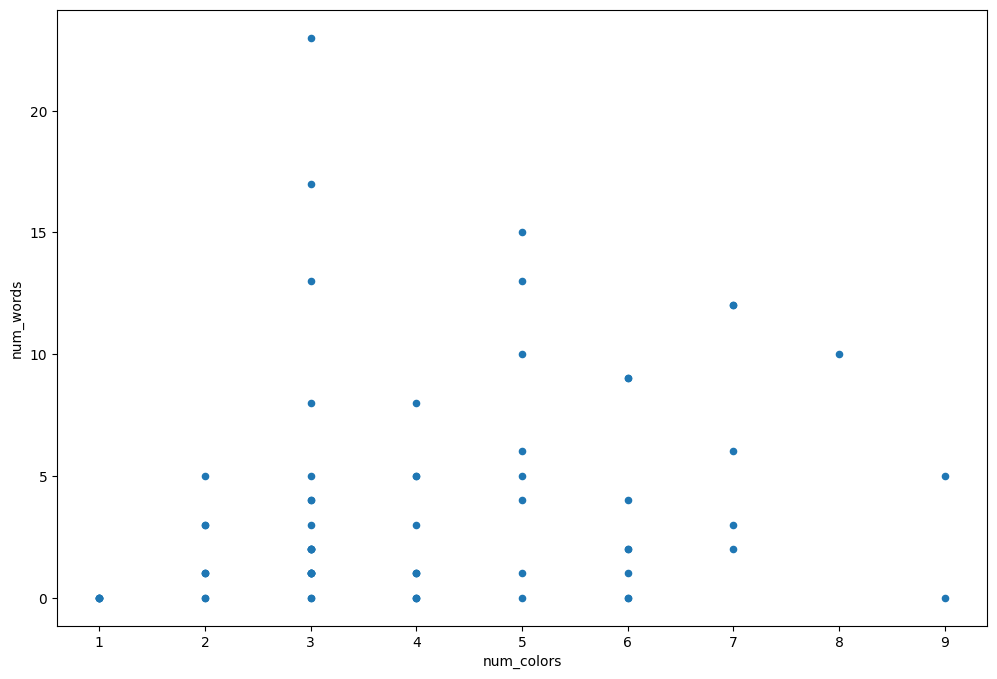

In [32]:
# Pandas built-in plot tools (which use Matplotlib under the hood)
# This is convenient, but doesn't give as much control as using the Matplotlib API
data.plot.scatter('num_colors', 'num_words');

## Matplotlib API

In [33]:
# There are many pre-defined styles... view the available options
print(mpl.style.available)
# or use the default style
plt.style.use('default')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [34]:
# Matplotlib scatter plot doesn't have built-in jitter option...
# but it's not too hard

def jitterify(arr, factor=0.01):
    """Add jitter 'factor' to 'arr' data
    :param arr: array-like, eg: list, ndarray
    :param factor: float, 0.0 -> 1.0
    :return: arr with added jitter
    """
    assert 0.0 <= factor <= 1.0, f"Error, invalid factor {factor}"
    arr = np.array(arr)
    assert arr.ndim == 1, f"Expected 1-d array, got {arr.ndim}"
    ptp = arr.ptp()
    jitter = np.random.randn(arr.size) * factor * ptp
    return arr + jitter


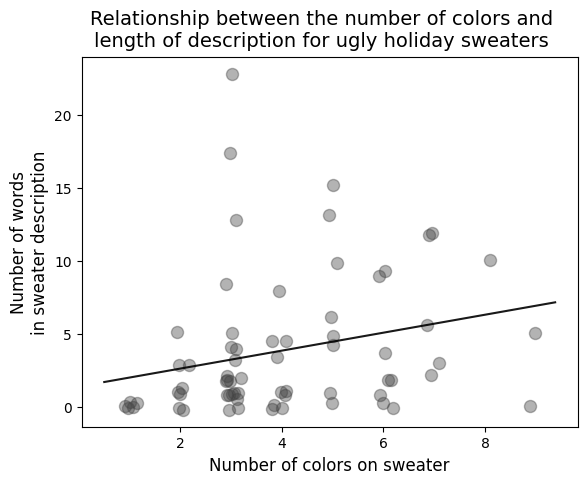

In [35]:
# Scatterplot docs:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

fontsize = 12
markersize = 75
color = '#424242'
alpha = 0.4
jitter = 0.01

# Instantiate plot objects
fig, ax = plt.subplots()

# Add labels to axes
ax.set_xlabel('Number of colors on sweater', fontsize=fontsize, color='k')
ax.set_ylabel('Number of words\nin sweater description', fontsize=fontsize, color='k')
# Add figure title
fig.suptitle("Relationship between the number of colors and\nlength of description for ugly holiday sweaters",
            color='k', fontsize=fontsize + 2)

# Specify what data to plot
x = data.num_colors
y = data.num_words
# Add jitter to data so completely overlapping
x = jitterify(x, jitter)
y = jitterify(y, jitter)

# Plot
ax.scatter(x, y,
            c=color,
            s=markersize,
            alpha=alpha,
            edgecolors=color,
            linewidths=1.
           )

# Add polyfit curve
coeffs = np.polyfit(data.num_colors, data.num_words, 1)
xlim = ax.get_xlim()
ax.plot(xlim, np.polyval(coeffs, xlim), color='k', alpha=0.9)

# Set tick increment
incr_x = 2
incr_y = 5
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(incr_x))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(incr_y))

## Seaborn library
This library is designed with data-science and clean asthetics in mind... check it out!<br>
https://seaborn.pydata.org/